In [1]:
import pandas as pd
import csv
from matplotlib import pyplot as plt
from fbprophet import Prophet
import numpy as np
import pystan

Importing plotly failed. Interactive plots will not work.


In [2]:
with open('BTC-USD.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')

In [3]:
df = pd.read_csv('coin_Bitcoin[1].csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]

In [6]:
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = prophet.make_future_dataframe(periods=365)
print(future)

                      ds
0    2013-04-29 23:59:59
1    2013-04-30 23:59:59
2    2013-05-01 23:59:59
3    2013-05-02 23:59:59
4    2013-05-03 23:59:59
...                  ...
3222 2022-02-23 23:59:59
3223 2022-02-24 23:59:59
3224 2022-02-25 23:59:59
3225 2022-02-26 23:59:59
3226 2022-02-27 23:59:59

[3227 rows x 1 columns]


In [8]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(20)

,ds,yhat,yhat_lower,yhat_upper
3207,2022-02-08 23:59:59,35993.093514,30266.747810,41210.591103
3208,2022-02-09 23:59:59,36205.807316,30740.797640,41440.760178
3209,2022-02-10 23:59:59,36383.831604,30949.665334,41308.128642
3210,2022-02-11 23:59:59,36578.079680,31242.249842,41497.659455
3211,2022-02-12 23:59:59,36753.030231,31841.430979,41779.951955
3212,2022-02-13 23:59:59,36825.225847,31531.159699,41845.925747
3213,2022-02-14 23:59:59,36967.344465,32140.878019,41989.029970
3214,2022-02-15 23:59:59,37054.001645,32299.704347,42326.966671
3215,2022-02-16 23:59:59,37152.846347,32337.076591,42237.950394
3216,2022-02-17 23:59:59,37196.564084,32299.259632,42625.579421


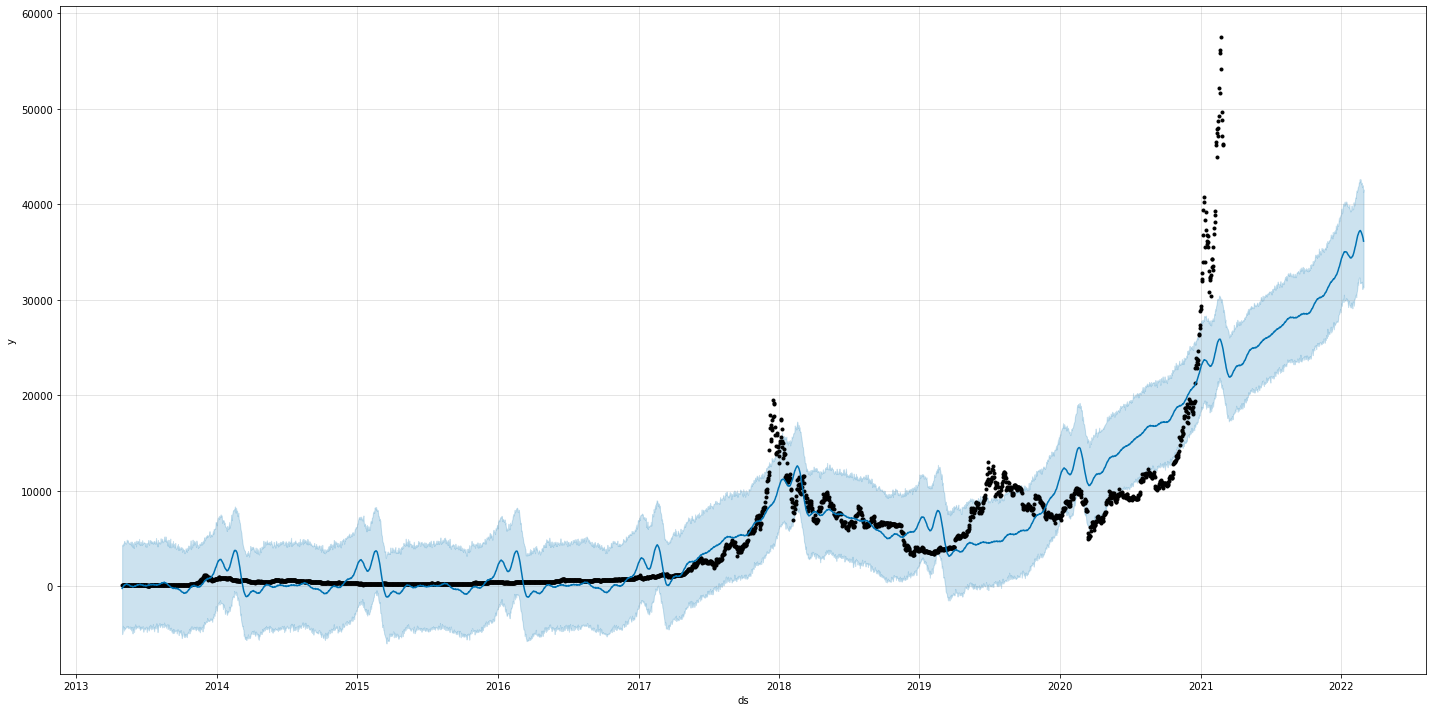

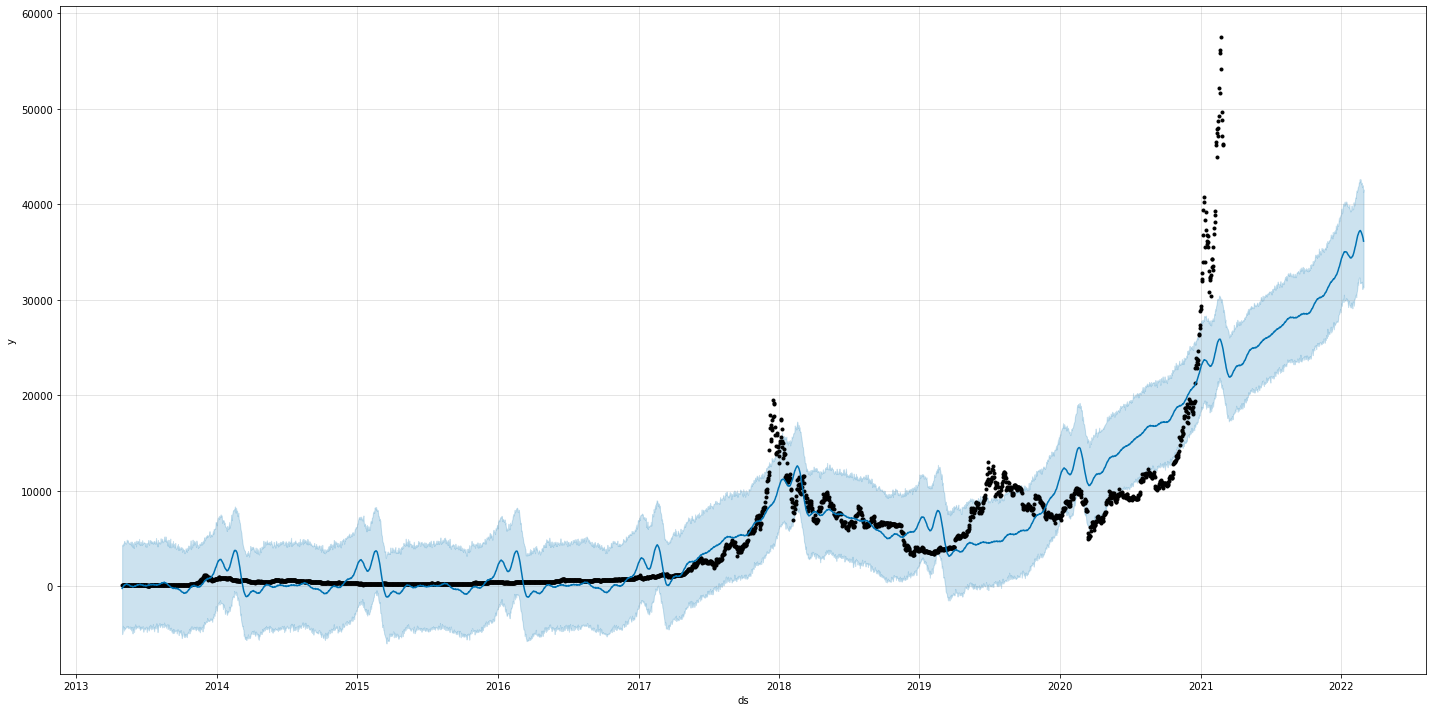

In [9]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))